In [1]:
# This script uses Recurrent Neural Network Regression model to predict the trend in Facebook's stock price

In [2]:
# 1. DATA PRE-PROCESSING

In [15]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

# feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

# create data structure with 60 timestamps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [20]:
# 2. BUILD AND TRAIN ANN

In [24]:
# import libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# initialize the RNN
regressor = Sequential()

# add 1st LSTM layer and dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# add 2nd LSTM layer and dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# add 3rd LSTM layer and dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# add 4th LSTM layer and dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# adding the output layer
regressor.add(Dense(units = 1))

# compile the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# fitting RNN to training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0398
Epoch 2/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0069
Epoch 3/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0055
Epoch 4/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0057
Epoch 5/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0056
Epoch 6/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0061
Epoch 7/100
38/38 [==============================] - 4s 97ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0047
Epoch 9/100
38/38 [==============================] - 4s 92ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 4s 98ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 3s 92ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0041
Epoch 13/100
38/38 

38/38 [==============================] - 3s 83ms/step - loss: 0.0015


In [25]:
# 3. MAKE PREDICTIONS

In [26]:
# import test data
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# create dataframe with train and test values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

# 
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

# 
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [27]:
# 4. VISUALIZE THE RESULTS

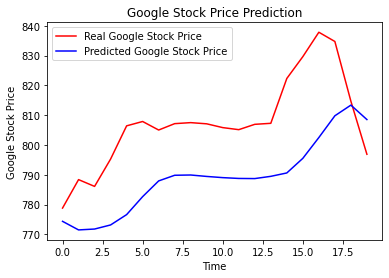

In [28]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()